In [24]:
import numpy as np
import pandas as pd
import os
import sys

embeddings = {} #embedding dictionary # rows = node_index # columns = vector

with open(os.path.join(sys.path[0], "karate_deepwalk.embeddings"), "r") as f:
    f.readline()# header
    first_vec = f.readline().split()
    first_vec = [float(i) for i in first_vec]
        
    embeddings[first_vec[0]] = first_vec[1:] 

    column_cnt = len(first_vec) - 1 # size of vector dimension
    
    while True:
        line = f.readline()
        if not line: break
        splitted_line = line.split()
        
        splitted_line = [float(i) for i in splitted_line]
            
        embeddings[splitted_line[0]] = splitted_line[1:]
        
print(embeddings)

two_dim_embed = []
values = list(embeddings.values())
for i in range(len(embeddings.keys())):
    two_dim_embed.append(values[i])
   
two_dim_embed = np.array(two_dim_embed)
print(two_dim_embed)

{33.0: [-0.23488903, -1.326953], 0.0: [1.1148056, -0.64009315], 32.0: [-0.28329763, -1.3349797], 2.0: [0.5103202, -0.94727033], 1.0: [0.79231566, -0.74405617], 31.0: [-0.17155616, -1.3509599], 23.0: [-0.6259915, -1.5598907], 3.0: [0.9251136, -0.83256096], 8.0: [-0.021803832, -1.1479889], 13.0: [0.6049188, -0.87491095], 29.0: [-0.3668977, -1.4279331], 30.0: [0.20279053, -1.0753523], 5.0: [2.4785345, -0.6586646], 6.0: [2.2315977, -0.47367758], 27.0: [-0.2286257, -1.2536482], 24.0: [-0.53133214, -1.7036369], 7.0: [1.1611446, -0.6051323], 25.0: [-0.5547037, -1.5746906], 10.0: [1.7833495, -0.58616585], 4.0: [2.001655, -0.470346], 18.0: [-0.37041453, -1.3417462], 19.0: [0.72562665, -0.86850613], 28.0: [-0.011449863, -1.2398852], 21.0: [1.2603729, -0.5032121], 26.0: [-0.36996487, -1.4871181], 14.0: [-0.43277922, -1.3337135], 22.0: [-0.69170314, -1.714579], 16.0: [2.7114892, -0.5914085], 15.0: [-0.5623086, -1.4802859], 17.0: [1.4049145, -0.68150336], 9.0: [0.1632475, -1.1857793], 20.0: [-0.540

In [18]:
missing=[0]*column_cnt

def node_vector(key):
    try:
        return(embeddings[key])
    except:
        return(missing)

In [3]:
vertices_index = list(embeddings.keys()) #order of vertices

In [5]:
df = pd.DataFrame(columns = range(0,column_cnt))

for i in range(len(vertices_index)):
    df.loc[i] = embeddings[float(i)]
    
print(df)



           0         1
0   1.114806 -0.640093
1   0.792316 -0.744056
2   0.510320 -0.947270
3   0.925114 -0.832561
4   2.001655 -0.470346
5   2.478534 -0.658665
6   2.231598 -0.473678
7   1.161145 -0.605132
8  -0.021804 -1.147989
9   0.163247 -1.185779
10  1.783349 -0.586166
11  1.317273 -0.542235
12  1.237675 -0.623268
13  0.604919 -0.874911
14 -0.432779 -1.333713
15 -0.562309 -1.480286
16  2.711489 -0.591409
17  1.404915 -0.681503
18 -0.370415 -1.341746
19  0.725627 -0.868506
20 -0.540270 -1.420904
21  1.260373 -0.503212
22 -0.691703 -1.714579
23 -0.625992 -1.559891
24 -0.531332 -1.703637
25 -0.554704 -1.574691
26 -0.369965 -1.487118
27 -0.228626 -1.253648
28 -0.011450 -1.239885
29 -0.366898 -1.427933
30  0.202791 -1.075352
31 -0.171556 -1.350960
32 -0.283298 -1.334980
33 -0.234889 -1.326953


In [5]:
#Implement PCA to reduce dimensionality of embeddings

#vector representation(embeddings) list
X = df.values.tolist()
#print(X)
#Computing correlation of matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

print(neww_X)

[[ 0.69284257+0.j -0.23879865+0.j]
 [ 0.53805939+0.j  0.38554409+0.j]
 [ 0.05875892+0.j  0.29633763+0.j]
 [ 0.58907046+0.j  0.43826645+0.j]
 [ 1.11711687+0.j -0.83080505+0.j]
 [ 1.20440722+0.j -1.07466843+0.j]
 [ 0.90292609+0.j -1.19928257+0.j]
 [ 0.46963124+0.j  0.39764824+0.j]
 [-0.27004655+0.j -0.05290159+0.j]
 [-0.3249949 +0.j  0.29054023+0.j]
 [ 1.14098347+0.j -0.90726127+0.j]
 [ 0.76754387+0.j -0.18419923+0.j]
 [ 0.50691046+0.j  0.20741899+0.j]
 [ 0.29516783+0.j  0.08533286+0.j]
 [-0.661367  +0.j -0.23360382+0.j]
 [-0.87302478+0.j -0.09497623+0.j]
 [ 1.25009541+0.j -1.33135076+0.j]
 [ 0.65150724+0.j  0.01956721+0.j]
 [-0.67221411+0.j -0.09549341+0.j]
 [ 0.29109399+0.j  0.05606373+0.j]
 [-0.59603879+0.j -0.00867389+0.j]
 [ 0.58690246+0.j -0.00345547+0.j]
 [-0.71625765+0.j -0.09230372+0.j]
 [-0.94570204+0.j -0.27063859+0.j]
 [-0.89698269+0.j -0.61933572+0.j]
 [-1.03309325+0.j -0.63341752+0.j]
 [-0.76871373+0.j  0.04309664+0.j]
 [-0.60571483+0.j -0.30125463+0.j]
 [-0.32042009+0.j -0

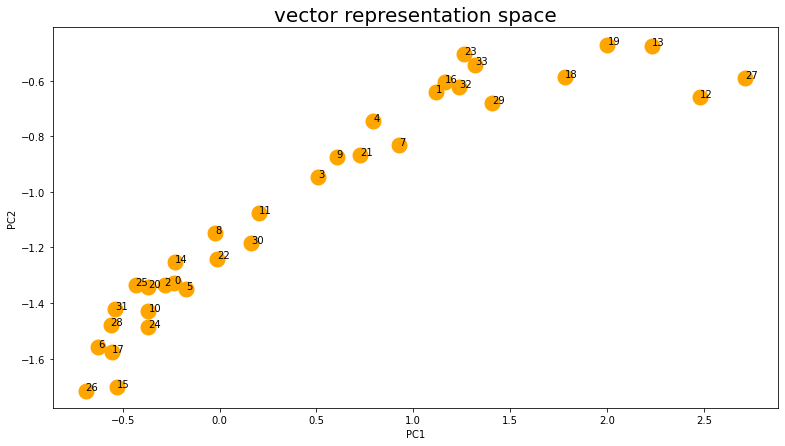

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))
plt.scatter(two_dim_embed[:,0],two_dim_embed[:,1],linewidths=10,color='orange')
plt.xlabel("PC1",size=10)
plt.ylabel("PC2",size=10)
plt.title("vector representation space",size=20)

nodes= list(df.index)

for i, word in enumerate(nodes):
  plt.annotate(word,xy=(two_dim_embed[i,0],two_dim_embed[i,1]))